In [2]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
from IPython.display import clear_output
from pandas.tseries.offsets import MonthEnd

In [3]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol
next_stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_Next_50')[3].Symbol

In [4]:
stocks += '.NS'
next_stocks += '.NS'

In [5]:
stocks = stocks.to_list()
next_stocks = next_stocks.to_list()

stocks = stocks + next_stocks 

In [6]:
df = yf.download(stocks,start='2010-01-01')['Close'] # downloads the daily closing price of all the Nifty-50 sonsituent stocks from 1st January,2010 until present

[*********************100%***********************]  100 of 100 completed


In [7]:
df

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,...,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,765.400024,913.599976,69.219017,NaN,111.349998,NaN,106.099998,347.149994,178.865005,NaN,...,375.825012,255.750000,71.074997,97.612503,966.099976,116.233330,NaN,413.850006,156.105011,NaN
2010-01-05,763.450012,901.750000,70.820740,NaN,115.190002,NaN,105.300003,366.375000,179.429993,NaN,...,375.924988,259.024994,72.532501,97.375000,986.099976,121.933334,NaN,416.899994,158.568756,NaN
2010-01-06,763.700012,907.599976,77.810081,NaN,120.900002,NaN,105.949997,353.924988,178.889999,NaN,...,367.424988,260.299988,73.699997,96.849998,987.299988,119.766663,NaN,412.450012,155.362503,NaN
2010-01-07,782.299988,913.349976,74.598969,NaN,119.470001,NaN,105.800003,356.924988,177.065002,NaN,...,357.200012,254.574997,75.532501,99.337502,978.349976,118.633331,NaN,407.799988,152.606262,NaN
2010-01-08,796.000000,912.150024,75.541611,NaN,119.330002,NaN,105.900002,355.725006,179.990005,NaN,...,349.899994,261.274994,74.834999,97.837502,990.299988,117.900002,NaN,404.200012,150.311264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,4317.200195,1971.949951,2639.750000,1020.049988,858.150024,923.549988,465.250000,4932.649902,3182.300049,664.500000,...,3401.649902,1218.849976,3078.300049,1975.750000,8219.299805,585.700012,899.299988,234.350006,414.600006,89.750000
2023-08-22,4324.299805,1979.099976,2698.050049,1015.099976,854.500000,960.150024,463.799988,4919.649902,3179.699951,672.549988,...,3382.149902,1213.199951,3075.600098,1976.599976,8203.500000,583.849976,906.000000,235.000000,417.100006,91.900002
2023-08-23,4302.600098,1965.250000,2530.300049,971.500000,825.700012,890.400024,453.299988,4945.600098,3168.800049,654.200012,...,3398.250000,1201.000000,3070.000000,1938.500000,8161.899902,585.750000,887.250000,238.000000,415.250000,94.300003


In [8]:
ret_df = df.pct_change() #gets the percentage change per day
ret_df

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,...,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.002548,-0.012971,0.023140,NaN,0.034486,NaN,-0.007540,0.055380,0.003159,NaN,...,0.000266,0.012805,0.020507,-0.002433,0.020702,0.049039,NaN,0.007370,0.015783,NaN
2010-01-06,0.000327,0.006487,0.098691,NaN,0.049570,NaN,0.006173,-0.033982,-0.003009,NaN,...,-0.022611,0.004922,0.016096,-0.005392,0.001217,-0.017769,NaN,-0.010674,-0.020220,NaN
2010-01-07,0.024355,0.006335,-0.041269,NaN,-0.011828,NaN,-0.001416,0.008476,-0.010202,NaN,...,-0.027829,-0.021994,0.024864,0.025684,-0.009065,-0.009463,NaN,-0.011274,-0.017741,NaN
2010-01-08,0.017512,-0.001314,0.012636,NaN,-0.001172,NaN,0.000945,-0.003362,0.016519,NaN,...,-0.020437,0.026318,-0.009234,-0.015100,0.012214,-0.006181,NaN,-0.008828,-0.015039,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,0.008809,0.019570,0.024191,0.025434,0.026618,0.059238,0.026929,0.017387,0.005927,0.015279,...,0.010261,0.006648,0.009130,-0.002449,0.000542,0.012533,0.000056,0.004285,0.007044,0.004477
2023-08-22,0.001644,0.003626,0.022085,-0.004853,-0.004253,0.039630,-0.003117,-0.002636,-0.000817,0.012114,...,-0.005733,-0.004636,-0.000877,0.000430,-0.001922,-0.003159,0.007450,0.002774,0.006030,0.023955
2023-08-23,-0.005018,-0.006998,-0.062175,-0.042951,-0.033704,-0.072645,-0.022639,0.005275,-0.003428,-0.027284,...,0.004760,-0.010056,-0.001821,-0.019276,-0.005071,0.003254,-0.020695,0.012766,-0.004435,0.026115


In [9]:
ret_df.index = pd.to_datetime(ret_df.index)
mtl_ret = (ret_df + 1).resample('M').prod() #converts the data to returns for the month (relative to price at the start of the month)

In [10]:
mtl_ret

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,...,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,1.059577,0.954138,0.981510,1.000000,1.069062,1.000000,0.959472,0.982212,1.035530,1.000000,...,0.979445,0.950635,1.055857,1.136637,0.962633,0.891311,1.000000,0.837864,0.933915,1.000000
2010-02-28,0.979778,1.058965,1.097800,1.000000,1.132140,1.000000,1.050589,1.001540,0.977189,1.000000,...,1.034773,0.916041,1.163469,0.986255,1.118333,0.974260,1.000000,1.154578,1.045605,1.000000
2010-03-31,1.044551,1.030278,0.965269,1.000000,1.171774,1.000000,1.120617,1.068155,1.126468,1.000000,...,1.024744,0.957625,1.054030,1.246173,1.110379,0.985469,1.000000,1.175097,1.043469,1.000000
2010-04-30,0.954699,0.951632,1.197679,1.000000,0.935917,1.000000,1.010013,1.075183,1.019594,1.000000,...,0.980465,0.907514,1.156824,0.984417,0.842317,1.140751,1.000000,0.911787,0.949855,1.000000
2010-05-31,1.084048,0.904425,0.964803,1.000000,0.942422,1.000000,0.899215,0.946328,1.003512,1.000000,...,0.970800,0.821751,1.043560,1.047677,0.947571,1.070212,1.000000,0.890314,0.997245,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,1.015690,1.057372,1.099689,1.079271,1.078177,1.036655,1.084667,1.047044,1.050948,1.089023,...,1.004164,0.929074,1.050479,1.074911,0.991348,1.031561,1.041961,1.017854,1.054073,1.272549
2023-05-31,1.207127,1.008140,1.295280,1.028076,1.084471,0.754481,1.068348,1.023983,1.100126,0.702804,...,1.021822,1.089724,1.068664,1.111057,1.041535,0.925436,1.172467,0.996241,1.048442,1.063945
2023-06-30,1.072009,1.020538,0.957768,0.967475,1.000541,0.987833,1.005430,1.103041,1.052960,0.985621,...,1.003876,1.013715,1.079483,1.037667,1.053964,1.003576,0.947269,0.998742,0.964078,1.086894


In [11]:
def performers(date,lookback_period,holding_period,n):
    try:
        mtl_lb = mtl_ret.rolling(lookback_period).apply(np.prod).dropna() #cumulative movement in the stock price over the previous "lookback_period" months
        top = mtl_lb.loc[date].nlargest(n) #gets the n best performing stocks for the given 'lookback_period' months #ERROR CORRECTED : mtl_lb instead of mtl_12
        bottom = mtl_lb.loc[date].nsmallest(n)
        relevant_ret_top = mtl_ret[top.name:][1:1+holding_period][top.index].rolling(holding_period).apply(np.prod)
        relevant_ret_bottom = mtl_ret[bottom.name:][1:1+holding_period][bottom.index].rolling(holding_period).apply(np.prod)
        return (relevant_ret_top).mean(axis = 1).values[holding_period-1],(relevant_ret_bottom).mean(axis = 1).values[holding_period-1] #returns the average returns for the top 'n' stocks given a holding period
    except KeyError:
        return 1,1

In [12]:
def getPortfolioReturns(lookback_period,holding_period,n):
    
    momentum_returns_winners = []
    momentum_returns_losers = []
    i=0
    for date in mtl_ret.index[:114:holding_period]: 
        momentum_returns_winners.append(performers(date,lookback_period,holding_period,n)[0])
        momentum_returns_losers.append(performers(date,lookback_period,holding_period,n)[1])
        clear_output(wait=True)
        print("[   Datapoint: %0.2f percent done   ]" % (i*holding_period/115*100))
        i+=1
        
    clear_output(wait=True)
    return round(pd.Series(momentum_returns_winners).mean(),2),round(pd.Series(momentum_returns_losers).mean(),2)

In [17]:
#compilation of results obtained by taking J = 1 and varying holding period
returns = []

for K in [3,6,9]:
    returns.append(getPortfolioReturns(1,K,10))
    
print(returns)

[(1.04, 1.05), (1.1, 1.11), (1.16, 1.16)]


In [18]:
returns

[(1.04, 1.05), (1.1, 1.11), (1.16, 1.16)]

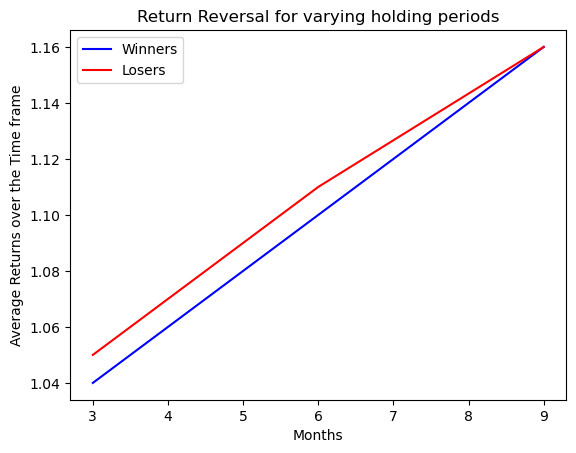

In [19]:
import matplotlib.pyplot as plt

# Coordinates of the points
points = [(1.04, 1.05), (1.1, 1.11), (1.16, 1.16)]

# Separate the x and y coordinates
x_values = [3,6,9]
y1_values = [point[0] for point in points]
y2_values = [point[1] for point in points]

# Create the plot
plt.plot(x_values, y1_values, 'b-', label='Winners')
plt.plot(x_values, y2_values, 'r-', label='Losers')

# Set the x and y axis labels
plt.xlabel('Months')
plt.ylabel('Average Returns over the Time frame')

# Set the plot title
plt.title('Return Reversal for varying holding periods')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [26]:
#compilation of results obtained by taking J = 1 and varying holding period
returns = []

for K in [3,6,9]:
    returns.append(getPortfolioReturns(1,K,20))
    
print(returns)

[(1.04, 1.05), (1.09, 1.09), (1.14, 1.15)]


In [28]:
print(returns)

[(1.04, 1.05), (1.09, 1.09), (1.14, 1.15)]


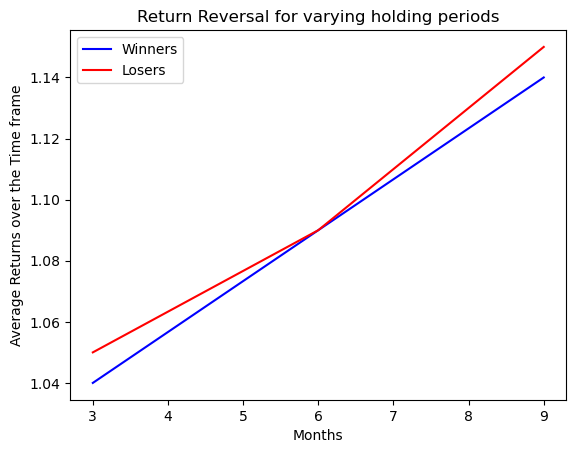

In [29]:
import matplotlib.pyplot as plt

# Coordinates of the points
points = [(1.04, 1.05), (1.09, 1.09), (1.14, 1.15)]

# Separate the x and y coordinates
x_values = [3,6,9]
y1_values = [point[0] for point in points]
y2_values = [point[1] for point in points]

# Create the plot
plt.plot(x_values, y1_values, 'b-', label='Winners')
plt.plot(x_values, y2_values, 'r-', label='Losers')

# Set the x and y axis labels
plt.xlabel('Months')
plt.ylabel('Average Returns over the Time frame')

# Set the plot title
plt.title('Return Reversal for varying holding periods')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [30]:
#compilation of results obtained by taking J = 1 and varying holding period
returns = []

for K in [3,6,9]:
    returns.append(getPortfolioReturns(1,K,25))
    
print(returns)

[(1.04, 1.05), (1.08, 1.09), (1.13, 1.14)]


In [32]:
returns

[(1.04, 1.05), (1.08, 1.09), (1.13, 1.14)]

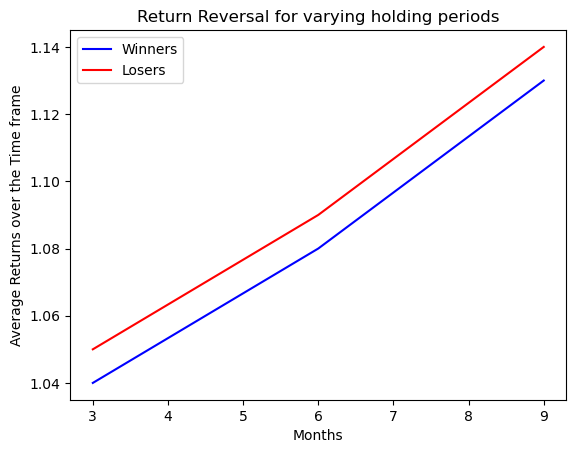

In [33]:
import matplotlib.pyplot as plt

# Coordinates of the points
points = [(1.04, 1.05), (1.08, 1.09), (1.13, 1.14)]

# Separate the x and y coordinates
x_values = [3,6,9]
y1_values = [point[0] for point in points]
y2_values = [point[1] for point in points]

# Create the plot
plt.plot(x_values, y1_values, 'b-', label='Winners')
plt.plot(x_values, y2_values, 'r-', label='Losers')

# Set the x and y axis labels
plt.xlabel('Months')
plt.ylabel('Average Returns over the Time frame')

# Set the plot title
plt.title('Return Reversal for varying holding periods')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [34]:
#compilation of results obtained by taking J = 1 and varying holding period
returns = []

for K in [3,6,9]:
    returns.append(getPortfolioReturns(1,K,50))
    
print(returns)

[(1.04, 1.04), (1.07, 1.09), (1.13, 1.13)]


In [35]:
returns

[(1.04, 1.04), (1.07, 1.09), (1.13, 1.13)]

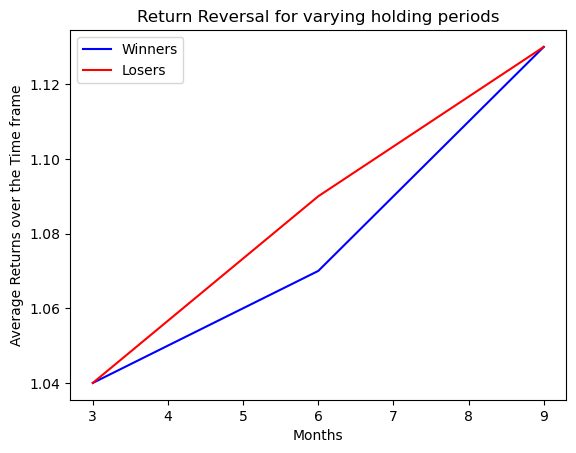

In [36]:
import matplotlib.pyplot as plt

# Coordinates of the points
points = [(1.04, 1.04), (1.07, 1.09), (1.13, 1.13)]

# Separate the x and y coordinates
x_values = [3,6,9]
y1_values = [point[0] for point in points]
y2_values = [point[1] for point in points]

# Create the plot
plt.plot(x_values, y1_values, 'b-', label='Winners')
plt.plot(x_values, y2_values, 'r-', label='Losers')

# Set the x and y axis labels
plt.xlabel('Months')
plt.ylabel('Average Returns over the Time frame')

# Set the plot title
plt.title('Return Reversal for varying holding periods')

# Show the legend
plt.legend()

# Show the plot
plt.show()